In [1]:
# Imports

from piecewise_fun import PieceFunction as pf, PiecewiseFunction as pwf
import numpy as np
from rand_pwf import random_piecewise_funct
from random import uniform

In [2]:
f1 = pf(start=0, end=1, equal=(False, True), function="3*x")
f2 = pf(start=1, end=3, equal=(False, False), function="10")
f3 = pf(start=3, end=6, equal=(False, True), function="3-2*x")

3
f(x)=3*x, x in (0,1]


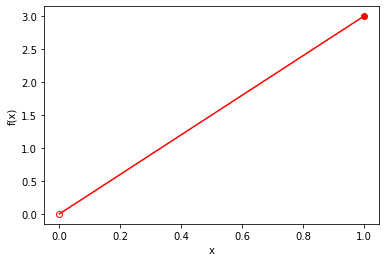

3
0


In [3]:
print(f1.eval(1))
f1.report_f()
print(f1.get_max())
print(f1.get_min())

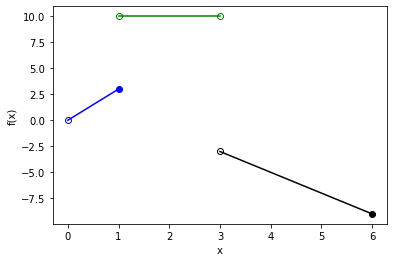

f(4) = -5
[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
]
The max value is: 10 from <f(x)=10, x in (1,3)> PieceFunction
(10, 1)
The min value is: -9 from <f(x)=3-2*x, x in (3,6]> PieceFunction
(-9, 2)


In [4]:
f_list = pwf([f1, f2, f3])

f_list.plot()
f_list.eval(4, verbose=True)
print(f_list)
print(f_list.get_max(verbose=True))
print(f_list.get_min(verbose=True))

[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
f(x)=3*x, x in (6,10]
]


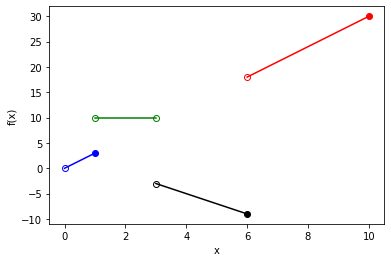

In [5]:
f4 = pf(start=6, end=10, equal=(False, True), function="3*x")

# Add the newly created function
f_list.add_fun(f4)
# The new Piecewise function
f_list.report_f()

The number of functions inside Piecewise is: 4
[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
f(x)=3*x, x in (6,10]
]


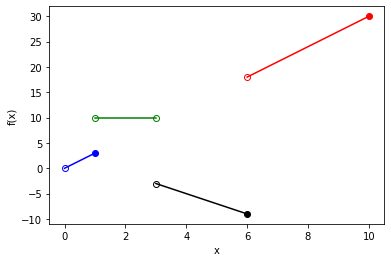

[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
]


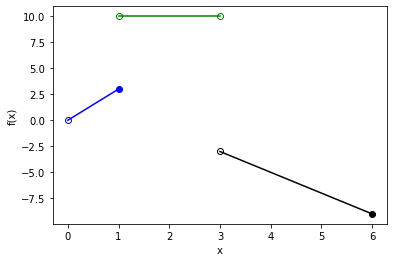

In [6]:
print("The number of functions inside Piecewise is: " + str(len(f_list)))
f_list.report_f()

# Remove the last function
f_list.remove_fun(-1)

# The new Piecewise function
f_list.report_f()

[
f(x)=5*x+1, x in [0,10)
f(x)=10*x+7, x in [10,16)
f(x)=4*x+-10, x in [16,17]
f(x)=3*x+-6, x in (17,22]
f(x)=8, x in (22,28]
f(x)=3*x+-2, x in (28,30)
f(x)=9*x+-2, x in [30,38)
f(x)=4*x+4, x in [38,44)
f(x)=7, x in [44,45)
f(x)=4*x+1, x in [45,52)
]


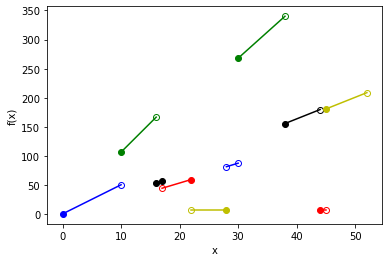

The max value is: 340 from <f(x)=9*x+-2, x in [30,38)> PieceFunction
(340, 6)
The min value is: 1 from <f(x)=5*x+1, x in [0,10)> PieceFunction
(1, 0)


In [7]:
import time
# Create a PiecewiseFunction which contains 10 randomly created constant/linear functions
fun_list=random_piecewise_funct(param_type=int, fun_number=10, fun_type="random")

fun_list.report_f()
print(fun_list.get_max(True))
print(fun_list.get_min(True))

100%|██████████| 20/20 [04:50<00:00, 14.51s/it]


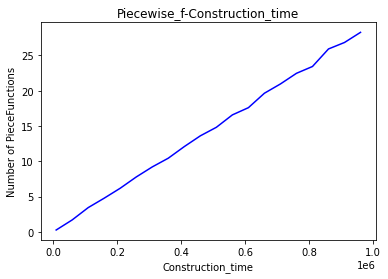

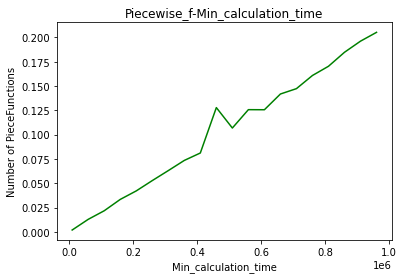

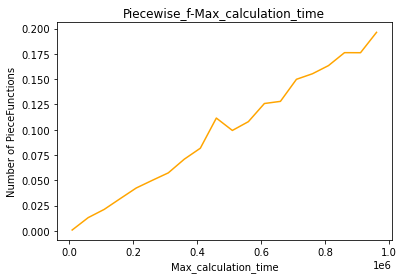

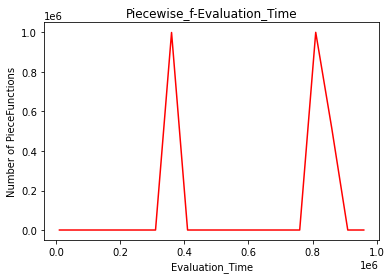

In [8]:
import time
from matplotlib import pyplot as plt
from tqdm import tqdm


def plot_statistics(title, xlabel, ylabel, x, y, color="red"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y, color=color)
    plt.show()


construction_times = []
min_times = []
max_times = []
evaluation_times = []
function_num = list(range(10000,1000000,50000))
for i in tqdm(function_num):
    start = time.time()
    f = random_piecewise_funct(int, i, max_limit=100)
    end = time.time()
    construction_times.append(end - start)

    f_start = 0 
    f_end = f.get_fun(-1).end
    random_value = uniform(f_start, f_end)   # Get a random float value to test the function
    start = time.time_ns()
    e=f.eval(random_value)
    end = time.time_ns()
    evaluation_times.append(end - start)

    start = time.time()
    f.get_min()
    end = time.time()
    min_times.append(end - start)

    start = time.time()
    f.get_max()
    end = time.time()
    max_times.append(end - start)

plot_statistics(title="Piecewise_f-Construction_time", ylabel="Number of PieceFunctions", xlabel="Construction_time", x=function_num, y=construction_times, color="blue")
plot_statistics(title="Piecewise_f-Min_calculation_time", ylabel="Number of PieceFunctions", xlabel="Min_calculation_time", x=function_num, y=min_times, color="green")
plot_statistics(title="Piecewise_f-Max_calculation_time", ylabel="Number of PieceFunctions", xlabel="Max_calculation_time", x=function_num, y=max_times, color="orange")
plot_statistics(title="Piecewise_f-Evaluation_Time", ylabel="Number of PieceFunctions", xlabel="Evaluation_Time", x=function_num, y=evaluation_times)